In [2]:
%load_ext autoreload
import numpy as np
import matplotlib.pyplot as plt
import time
import qutip as q
from scipy import integrate,special
from scipy.linalg import eig,eigh,eigvals,eigvalsh
import pickle 
from functions import diagonalize_2,isingmodel_rev_frac2
from functions import construct_ham,construct_distant_ham_2sites
from math import floor, ceil

In [3]:
L=3
length=12
lambdarange=np.linspace(0,2,100)

In [10]:
midrhodic={}

startpsi=np.zeros(2**length)
startpsi[0]=1/np.sqrt(2)
startpsi[-1]=1/np.sqrt(2)
for i,l in enumerate(lambdarange):

    Energies,psis=diagonalize_2(1,length,isingmodel_rev_frac2(l,0.00),False,startpsi)

    reshapedpsi0=psis[:,0].reshape(2**int((length-2)/2),8,2**int((length-4)/2)).transpose(1,0,2).reshape(8,-1)

    rhomagn0 = np.dot(reshapedpsi0, reshapedpsi0.conjugate().transpose())

    midrhodic[l]=rhomagn0


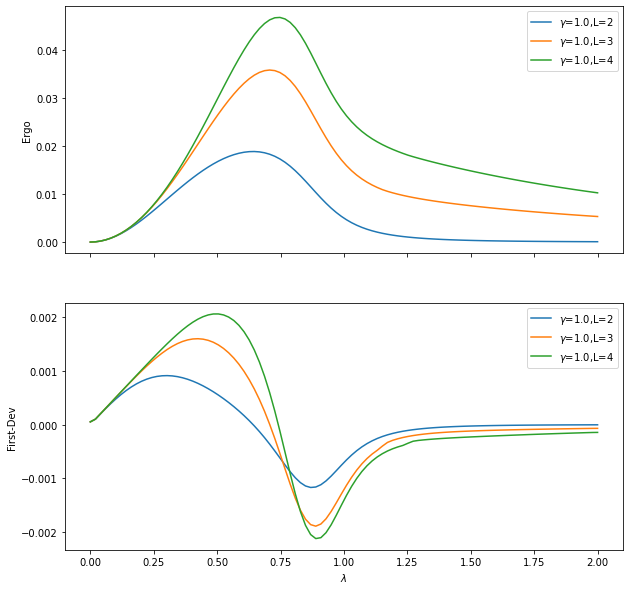

In [46]:
def Hamiltonian(l):
    return construct_ham(L, l)
gs=1
fig, axs = plt.subplots(2,sharex=True,figsize=[10,10])

for L in range(2,5):    

    midrhodic={}

    startpsi=np.zeros(2**length)
    startpsi[0]=1/np.sqrt(2)
    startpsi[-1]=1/np.sqrt(2)
    for i,l in enumerate(lambdarange):

        Energies,psis=diagonalize_2(1,length,isingmodel_rev_frac2(l,0.00),False,startpsi)

        reshapedpsi0=psis[:,0].reshape(2**floor((length-L)/2),2**L,2**ceil((length-L)/2)).transpose(1,0,2).reshape(2**L,-1)

        rhomagn0 = np.dot(reshapedpsi0, reshapedpsi0.conjugate().transpose())

        midrhodic[l]=rhomagn0



    energies_pass=np.zeros_like(lambdarange)
    energies_subs=np.zeros_like(lambdarange)

    for j,l in enumerate(lambdarange):    


        eigval=eigvalsh(midrhodic[l])


        qrho_2=q.Qobj(midrhodic[l],dims=[[2]*L, [2]*L])


        reduced_H_matr=Hamiltonian(l)

        h_eigval, h_eigvec= reduced_H_matr.eigenstates()

        rho_pass=q.Qobj()

        sortdesc=np.sort(eigval)[::-1]

        for i in range(len(eigval)):    
            rho_pass+=sortdesc[i]*q.ket2dm(h_eigvec[i])

        ener_pass=q.expect(rho_pass,reduced_H_matr)-h_eigval[0]

        ener_subs=q.expect(qrho_2,reduced_H_matr)-h_eigval[0]

        energies_pass[j]=(ener_pass)
        energies_subs[j]=(ener_subs)

    ergoarr=np.array(energies_subs)-np.array(energies_pass)
    axs[0].plot(lambdarange,ergoarr,label=r"$\gamma$={:.1f},L={}".format(gs,L))

    axs[1].plot(lambdarange,np.gradient(ergoarr),label=r"$\gamma$={:.1f},L={}".format(gs,L))


    plt.xlabel(r"$\lambda$")
    axs[0].legend()
    axs[0].set_ylabel("Ergo")
    axs[1].legend()
    axs[1].set_ylabel("First-Dev")
#plt.savefig("ergo_lanczos")

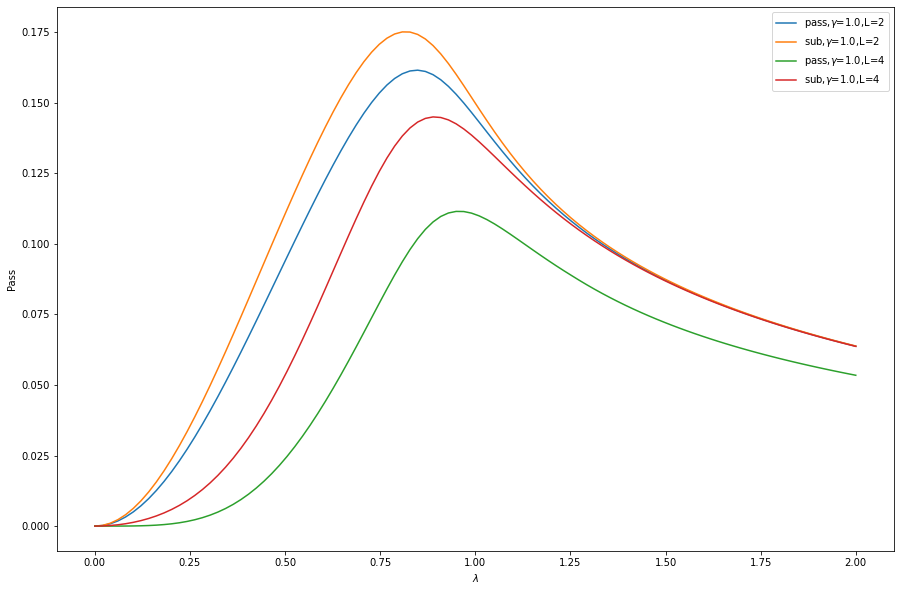

In [47]:
def Hamiltonian(l):
    return construct_ham(L, l)
gs=1
fig, axs = plt.subplots(1,sharex=True,figsize=[15,10])

for L in (2,4):    

    midrhodic={}

    startpsi=np.zeros(2**length)
    startpsi[0]=1/np.sqrt(2)
    startpsi[-1]=1/np.sqrt(2)
    for i,l in enumerate(lambdarange):

        Energies,psis=diagonalize_2(1,length,isingmodel_rev_frac2(l,0.00),False,startpsi)

        reshapedpsi0=psis[:,0].reshape(2**floor((length-L)/2),2**L,2**ceil((length-L)/2)).transpose(1,0,2).reshape(2**L,-1)

        rhomagn0 = np.dot(reshapedpsi0, reshapedpsi0.conjugate().transpose())

        midrhodic[l]=rhomagn0



    energies_pass=np.zeros_like(lambdarange)
    energies_subs=np.zeros_like(lambdarange)

    for j,l in enumerate(lambdarange):    


        eigval=eigvalsh(midrhodic[l])


        qrho_2=q.Qobj(midrhodic[l],dims=[[2]*L, [2]*L])


        reduced_H_matr=Hamiltonian(l)

        h_eigval, h_eigvec= reduced_H_matr.eigenstates()

        rho_pass=q.Qobj()

        sortdesc=np.sort(eigval)[::-1]

        for i in range(len(eigval)):    
            rho_pass+=sortdesc[i]*q.ket2dm(h_eigvec[i])

        ener_pass=q.expect(rho_pass,reduced_H_matr)-h_eigval[0]

        ener_subs=q.expect(qrho_2,reduced_H_matr)-h_eigval[0]

        energies_pass[j]=(ener_pass)
        energies_subs[j]=(ener_subs)

    ergoarr=np.array(energies_subs)-np.array(energies_pass)
    axs.plot(lambdarange,energies_pass,label=r"pass,$\gamma$={:.1f},L={}".format(gs,L))

    axs.plot(lambdarange,energies_subs,label=r"sub,$\gamma$={:.1f},L={}".format(gs,L))


    plt.xlabel(r"$\lambda$")
    axs.legend()
    axs.set_ylabel("Pass")
    #axs[1].legend()
    #axs[1].set_ylabel("First-Dev")
#plt.savefig("ergo_lanczos")

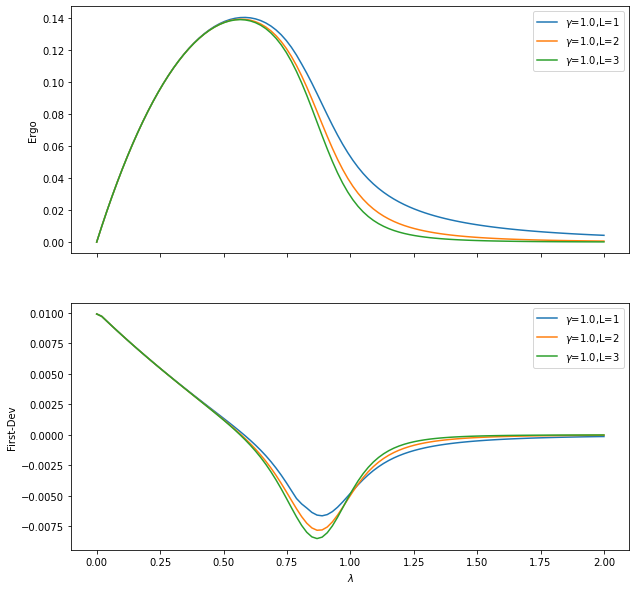

In [48]:
def dist_Hamiltonian(lam):
    return -0.5*(lam*q.tensor(q.sigmaz(),q.identity(2))+lam*q.tensor(q.identity(2),q.sigmaz()))
gs=1
fig, axs = plt.subplots(2,sharex=True,figsize=[10,10])

for L in range(1,4):    

    midrhodic={}

    startpsi=np.zeros(2**length)
    startpsi[0]=1/np.sqrt(2)
    startpsi[-1]=1/np.sqrt(2)
    for i,l in enumerate(lambdarange):

        Energies,psis=diagonalize_2(1,length,isingmodel_rev_frac2(l,0.00),False,startpsi)

        reshapedpsi0=psis[:,0].reshape(2**floor((length-L-2)/2),2,2**L,2,2**ceil((length-L-2)/2)).transpose(1,3,0,2,4).reshape(4,-1)

        rhomagn0 = np.dot(reshapedpsi0, reshapedpsi0.conjugate().transpose())

        midrhodic[l]=rhomagn0



    energies_pass=np.zeros_like(lambdarange)
    energies_subs=np.zeros_like(lambdarange)

    for j,l in enumerate(lambdarange):    


        eigval=eigvalsh(midrhodic[l])


        qrho_2=q.Qobj(midrhodic[l],dims=[[2,2], [2,2]])


        reduced_H_matr=dist_Hamiltonian(l)

        h_eigval, h_eigvec= reduced_H_matr.eigenstates()

        rho_pass=q.Qobj()
        

        sortdesc=np.sort(eigval)[::-1]

        for i in range(len(eigval)):    
            rho_pass+=sortdesc[i]*q.ket2dm(h_eigvec[i])

        ener_pass=q.expect(rho_pass,reduced_H_matr)-h_eigval[0]

        ener_subs=q.expect(qrho_2,reduced_H_matr)-h_eigval[0]

        energies_pass[j]=(ener_pass)
        energies_subs[j]=(ener_subs)

    ergoarr=np.array(energies_subs)-np.array(energies_pass)
    axs[0].plot(lambdarange,ergoarr,label=r"$\gamma$={:.1f},L={}".format(gs,L))

    axs[1].plot(lambdarange,np.gradient(ergoarr),label=r"$\gamma$={:.1f},L={}".format(gs,L))


    plt.xlabel(r"$\lambda$")
    axs[0].legend()
    axs[0].set_ylabel("Ergo")
    axs[1].legend()
    axs[1].set_ylabel("First-Dev")
#plt.savefig("ergo_lanczos")

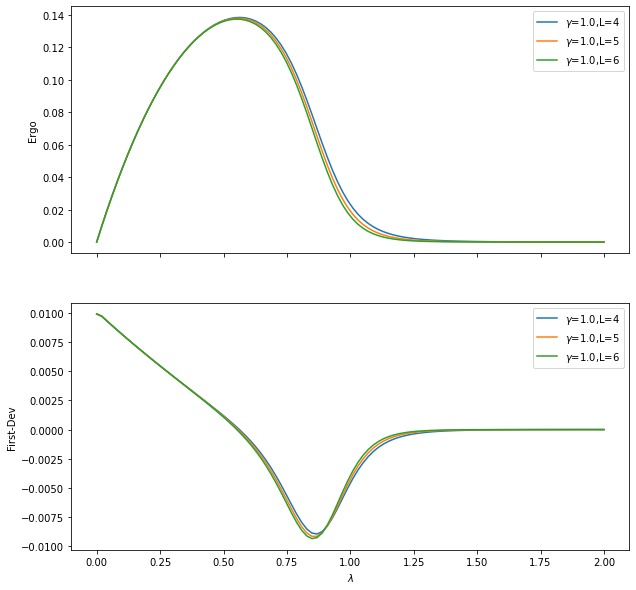

In [49]:
def dist_Hamiltonian(lam):
    return -0.5*(lam*q.tensor(q.sigmaz(),q.identity(2))+lam*q.tensor(q.identity(2),q.sigmaz()))
gs=1
fig, axs = plt.subplots(2,sharex=True,figsize=[10,10])

for L in range(4,7):    

    midrhodic={}

    startpsi=np.zeros(2**length)
    startpsi[0]=1/np.sqrt(2)
    startpsi[-1]=1/np.sqrt(2)
    for i,l in enumerate(lambdarange):

        Energies,psis=diagonalize_2(1,length,isingmodel_rev_frac2(l,0.00),False,startpsi)

        reshapedpsi0=psis[:,0].reshape(2**floor((length-L-2)/2),2,2**L,2,2**ceil((length-L-2)/2)).transpose(1,3,0,2,4).reshape(4,-1)

        rhomagn0 = np.dot(reshapedpsi0, reshapedpsi0.conjugate().transpose())

        midrhodic[l]=rhomagn0



    energies_pass=np.zeros_like(lambdarange)
    energies_subs=np.zeros_like(lambdarange)

    for j,l in enumerate(lambdarange):    


        eigval=eigvalsh(midrhodic[l])


        qrho_2=q.Qobj(midrhodic[l],dims=[[2,2], [2,2]])


        reduced_H_matr=dist_Hamiltonian(l)

        h_eigval, h_eigvec= reduced_H_matr.eigenstates()

        rho_pass=q.Qobj()
        

        sortdesc=np.sort(eigval)[::-1]

        for i in range(len(eigval)):    
            rho_pass+=sortdesc[i]*q.ket2dm(h_eigvec[i])

        ener_pass=q.expect(rho_pass,reduced_H_matr)-h_eigval[0]

        ener_subs=q.expect(qrho_2,reduced_H_matr)-h_eigval[0]

        energies_pass[j]=(ener_pass)
        energies_subs[j]=(ener_subs)

    ergoarr=np.array(energies_subs)-np.array(energies_pass)
    axs[0].plot(lambdarange,ergoarr,label=r"$\gamma$={:.1f},L={}".format(gs,L))

    axs[1].plot(lambdarange,np.gradient(ergoarr),label=r"$\gamma$={:.1f},L={}".format(gs,L))


    plt.xlabel(r"$\lambda$")
    axs[0].legend()
    axs[0].set_ylabel("Ergo")
    axs[1].legend()
    axs[1].set_ylabel("First-Dev")
#plt.savefig("ergo_lanczos")